# Handwritten Digits Recognition Using Shallow Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Training data comes from the "MNIST" data set, you can download it from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data).

## Section 1, Data Preparation

In [3]:
data = np.genfromtxt("train.csv", delimiter=',', skip_header=1)
print(data.shape)

(42000, 785)


In [4]:
np.random.shuffle(data)
print(data.shape)
print(data[:10, 0])

(42000, 785)
[0. 0. 4. 4. 9. 4. 9. 5. 2. 3.]


In [5]:
features = data[:, 1:].T
labels = data[:, 0]
labels = np.reshape(labels, (1, -1))
print(features.shape)
print(labels.shape)

(784, 42000)
(1, 42000)


In [6]:
m = features.shape[1]
nx = features.shape[0]
ny = 10

In [7]:
def labels_to_Y(labels):
    Y = np.zeros((ny, m))
    for i in range(m):
        Y[int(labels[0, i]), i] = 1
    return Y

def Y_to_labels(Y):
    labels = np.argmax(Y, axis=0)
    labels = np.reshape(labels, (1, -1))
    return labels

def X_to_images(X):
    images = [np.reshape(X[:, i], (28, 28)) for i in range(X.shape[1])]
    return images

(10, 42000)
0.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


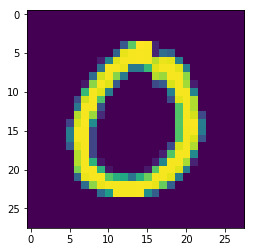

In [8]:
X = features / 255
Y = labels_to_Y(labels)
images = X_to_images(X)
print(Y.shape)
plt.imshow(images[0])
print(labels[0, 0])
print(Y[:, 0])

In [9]:
train_ratio = 0.8
test_ratio = 1 - train_ratio
train_m = int(m * train_ratio)
test_m = m - train_m
train_X = X[:, :train_m]
test_X = X[:, train_m:]
train_Y = Y[:, :train_m]
test_Y = Y[:, train_m:]
train_labels = Y_to_labels(train_Y)
test_labels = Y_to_labels(test_Y)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
print(train_labels.shape)

(784, 33600)
(10, 33600)
(784, 8400)
(10, 8400)
(1, 33600)


## Section 2, Design Neural Network

In [31]:
def sigmoid(z):
    a = 1/ (1 + np.exp(-z))
    return a

def sigmoid_prime(z):
    p1 = np.exp(-z)
    a = p1/((1+p1)**2)
    return a

def relu(z):
    a = np.maximum(z, 0.01*z)
    return a

def relu_prime(z):
    a = np.where(z > 0, 1, 0.01)
    return a

def tanh(z):
    p1 = np.exp(z)
    p2 = np.exp(-z)
    a = (p1-p2)/(p1+p2)
    return a
    
def tanh_prime(z):
    p1 = tanh(z)
    a = 1-p1**2
    return a

def loss(Y_hat, Y):
    l = -(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat))
    return l

In [108]:
n = [nx, 200, 25, ny]
f = [None, tanh, tanh, sigmoid]
f_prime = [None, tanh_prime, tanh_prime, sigmoid_prime]
L = len(n) - 1
W = [np.random.normal(0, 1, (n[i], n[i-1])) if i != 0 else None for i in range(L+1)]
b = [np.random.normal(0, 1, (n[i], 1)) if i != 0 else None for i in range(L+1)]
Z = [None for i in range(L+1)]
A = [None for i in range(L+1)]
dW = [None for i in range(L+1)]
db = [None for i in range(L+1)]
dA = [None for i in range(L+1)]
dZ = [None for i in range(L+1)]
costs = []
print(len(W))

4


In [90]:
print(tanh(0))

0.0


In [91]:
def forward_propagation():
    A[0] = train_X
    for i in range(1, L+1):
        Z[i] = np.matmul(W[i], A[i-1]) + b[i]
        A[i] = f[i](Z[i])
    costs.append(np.sum(loss(A[L], train_Y)))
    
def back_propagation():
    dZ[L] = A[L] - train_Y
    dW[L] = np.matmul(dZ[L], A[L-1].T)/train_m
    db[L] = np.sum(dZ[L], axis=1, keepdims=True)/train_m
    for i in reversed(range(1, L)):
        dZ[i] = np.matmul(W[i+1].T, dZ[i+1]) * f_prime[i](Z[i])
        dW[i] = np.matmul(dZ[i], A[i-1].T)/train_m
        db[i] = np.sum(dZ[i], axis=1, keepdims=True)/train_m
    #print(dW[2])
    #print(dW[3])

def update(learning_rate):
    for i in range(1, L+1):
        W[i] -= learning_rate*dW[i]
        b[i] -= learning_rate*db[i]
    

In [92]:
def train(iteration_times, learning_rate):
    for i in range(iteration_times):
        forward_propagation()
        back_propagation()
        update(learning_rate)
        print("iteration %d, current loss: %f" % (i, costs[len(costs)-1]))
        

iteration 0, current loss: 17417.160436
iteration 1, current loss: 17411.993052
iteration 2, current loss: 17406.829499
iteration 3, current loss: 17401.669664
iteration 4, current loss: 17396.513537
iteration 5, current loss: 17391.361191
iteration 6, current loss: 17386.212760
iteration 7, current loss: 17381.068398
iteration 8, current loss: 17375.928251
iteration 9, current loss: 17370.792435
iteration 10, current loss: 17365.661018
iteration 11, current loss: 17360.534029
iteration 12, current loss: 17355.411463
iteration 13, current loss: 17350.293293
iteration 14, current loss: 17345.179476
iteration 15, current loss: 17340.069962
iteration 16, current loss: 17334.964680
iteration 17, current loss: 17329.863528
iteration 18, current loss: 17324.766353
iteration 19, current loss: 17319.672927
iteration 20, current loss: 17314.582927
iteration 21, current loss: 17309.495923
iteration 22, current loss: 17304.411367
iteration 23, current loss: 17299.328604
iteration 24, current loss

iteration 198, current loss: 16499.129672
iteration 199, current loss: 16494.895534
iteration 200, current loss: 16490.649286
iteration 201, current loss: 16486.401410
iteration 202, current loss: 16482.164216
iteration 203, current loss: 16477.947279
iteration 204, current loss: 16473.754570
iteration 205, current loss: 16469.585019
iteration 206, current loss: 16465.434927
iteration 207, current loss: 16461.300028
iteration 208, current loss: 16457.176509
iteration 209, current loss: 16453.061284
iteration 210, current loss: 16448.951934
iteration 211, current loss: 16444.846545
iteration 212, current loss: 16440.743547
iteration 213, current loss: 16436.641589
iteration 214, current loss: 16432.539440
iteration 215, current loss: 16428.435922
iteration 216, current loss: 16424.329865
iteration 217, current loss: 16420.220079
iteration 218, current loss: 16416.105333
iteration 219, current loss: 16411.984353
iteration 220, current loss: 16407.855808
iteration 221, current loss: 16403

iteration 394, current loss: 15721.593961
iteration 395, current loss: 15717.904495
iteration 396, current loss: 15714.210270
iteration 397, current loss: 15710.510182
iteration 398, current loss: 15706.803073
iteration 399, current loss: 15703.087746
iteration 400, current loss: 15699.363003
iteration 401, current loss: 15695.627692
iteration 402, current loss: 15691.880774
iteration 403, current loss: 15688.121397
iteration 404, current loss: 15684.348973
iteration 405, current loss: 15680.563234
iteration 406, current loss: 15676.764261
iteration 407, current loss: 15672.952458
iteration 408, current loss: 15669.128484
iteration 409, current loss: 15665.293162
iteration 410, current loss: 15661.447380
iteration 411, current loss: 15657.592015
iteration 412, current loss: 15653.727872
iteration 413, current loss: 15649.855626
iteration 414, current loss: 15645.975733
iteration 415, current loss: 15642.088329
iteration 416, current loss: 15638.193108
iteration 417, current loss: 15634

iteration 590, current loss: 15025.714842
iteration 591, current loss: 15022.617034
iteration 592, current loss: 15019.527907
iteration 593, current loss: 15016.448749
iteration 594, current loss: 15013.380337
iteration 595, current loss: 15010.323040
iteration 596, current loss: 15007.276954
iteration 597, current loss: 15004.242018
iteration 598, current loss: 15001.218101
iteration 599, current loss: 14998.205027
iteration 600, current loss: 14995.202584
iteration 601, current loss: 14992.210501
iteration 602, current loss: 14989.228434
iteration 603, current loss: 14986.255949
iteration 604, current loss: 14983.292525
iteration 605, current loss: 14980.337570
iteration 606, current loss: 14977.390441
iteration 607, current loss: 14974.450475
iteration 608, current loss: 14971.517011
iteration 609, current loss: 14968.589413
iteration 610, current loss: 14965.667081
iteration 611, current loss: 14962.749465
iteration 612, current loss: 14959.836062
iteration 613, current loss: 14956

iteration 786, current loss: 14458.372900
iteration 787, current loss: 14455.821160
iteration 788, current loss: 14453.275800
iteration 789, current loss: 14450.736567
iteration 790, current loss: 14448.203111
iteration 791, current loss: 14445.675004
iteration 792, current loss: 14443.151744
iteration 793, current loss: 14440.632770
iteration 794, current loss: 14438.117478
iteration 795, current loss: 14435.605228
iteration 796, current loss: 14433.095358
iteration 797, current loss: 14430.587197
iteration 798, current loss: 14428.080070
iteration 799, current loss: 14425.573311
iteration 800, current loss: 14423.066269
iteration 801, current loss: 14420.558312
iteration 802, current loss: 14418.048837
iteration 803, current loss: 14415.537276
iteration 804, current loss: 14413.023094
iteration 805, current loss: 14410.505802
iteration 806, current loss: 14407.984958
iteration 807, current loss: 14405.460170
iteration 808, current loss: 14402.931104
iteration 809, current loss: 14400

iteration 982, current loss: 13958.578256
iteration 983, current loss: 13956.220859
iteration 984, current loss: 13953.868881
iteration 985, current loss: 13951.521975
iteration 986, current loss: 13949.179766
iteration 987, current loss: 13946.841850
iteration 988, current loss: 13944.507798
iteration 989, current loss: 13942.177160
iteration 990, current loss: 13939.849465
iteration 991, current loss: 13937.524229
iteration 992, current loss: 13935.200952
iteration 993, current loss: 13932.879125
iteration 994, current loss: 13930.558233
iteration 995, current loss: 13928.237762
iteration 996, current loss: 13925.917196
iteration 997, current loss: 13923.596031
iteration 998, current loss: 13921.273773
iteration 999, current loss: 13918.949950


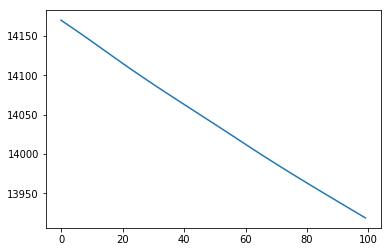

In [118]:
train(1000, 1)
plt.plot(costs[-100:])
#print(W[1])

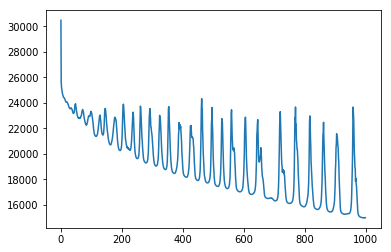

In [101]:
plt.plot(costs[-1000:])

## Section 3, Inspect Performance

In [55]:
def predict(X):
    A[0] = X
    for i in range(1, L+1):
        Z[i] = np.matmul(W[i], A[i-1]) + b[i]
        A[i] = f[i](Z[i])
    return A[L]

def get_accuracy(pred, real):
    right = np.sum(pred==real)
    acc = right/real.shape[1]
    return acc

In [119]:
pred = predict(train_X)
pred = Y_to_labels(pred)
acc = get_accuracy(pred, train_labels)
print("training set accuracy: %f" % acc)
pred = predict(test_X)
pred = Y_to_labels(pred)
acc = get_accuracy(pred, test_labels)
print("test set accuracy: %f" % acc)

training set accuracy: 0.939018
test set accuracy: 0.822250


In [78]:
np.savez("W-four-layer", *W)
np.savez("b-four-layer", *b)

In [79]:
test_X = np.genfromtxt("test.csv", delimiter=',', skip_header=1)
test_X = test_X.T
test_X = test_X/255
print(test_X.shape)

(784, 28000)


In [80]:
test_Y = predict(test_X)
test_labels = Y_to_labels(test_Y)
print(test_labels.shape)

(1, 28000)


In [81]:
output = np.zeros((test_labels.shape[1], 2), dtype=int)
for i in range(output.shape[0]):
    output[i, 0] = i+1
    output[i, 1] = test_labels[0, i]

In [82]:
np.savetxt("4layer-submission.csv", output, fmt="%d", delimiter=',', header='ImageId,Label')

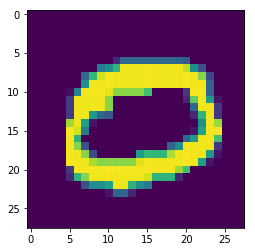

In [83]:
test_images = X_to_images(test_X)
plt.imshow(test_images[1])